In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
from google.colab import drive, output
drive.mount('/content/drive')
%load_ext autoreload
%autoreload 1
sys.path.append('/content/drive/MyDrive/Jaguas_2018')
%cd '/content/drive/MyDrive/Jaguas_2018'
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1nfTdDkppiuyI6pOFb93wUYtK8j6DA0cv/Jaguas_2018


##Librerias

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import librosa
import os
from pathlib import Path
import librosa.display
from librosa.display import specshow
import pickle
from IPython.display import Audio #reproducir audio

##cargar ruta y audios

In [4]:
root_path = '/content/drive/MyDrive/Jaguas_2018'
folders = os.listdir(root_path)
files = []
for i in range(len(folders)):
    path_aux = "{}/{}".format(root_path, folders[i])
    files += list(Path(path_aux).rglob("*.{}".format("wav")))

filename = str(files[12000])
filename2 = str(files[1000])
filename3 = str(files[900])
print(filename)
print(filename2)
print(filename3)

/content/drive/MyDrive/Jaguas_2018/G28_m/G28_20180610_164800.wav
/content/drive/MyDrive/Jaguas_2018/G46_m/G46_20180703_004800.wav
/content/drive/MyDrive/Jaguas_2018/G46_m/G46_20180701_132000.wav


##Obtener PSD(Power Spectral Density) densidad espectral de potencia

(array([4.35772447e-02, 2.45592506e-02, 3.44554955e-03, 3.86792532e-03,
        3.54376764e-03, 2.87288532e-03, 2.18213000e-03, 2.12585772e-03,
        2.75416176e-03, 3.56351241e-03, 4.28034513e-03, 4.67738483e-03,
        4.88031585e-03, 5.01251275e-03, 5.15526573e-03, 6.09490623e-03,
        8.08047946e-03, 7.27541025e-03, 6.52052368e-03, 7.40973769e-03,
        8.44293312e-03, 1.32457208e-02, 2.12395645e-02, 1.16445882e-02,
        5.42060334e-03, 4.22456690e-03, 3.83490945e-03, 2.65210641e-03,
        1.61455203e-03, 2.21023738e-03, 5.22897486e-03, 4.03093842e-03,
        8.12797367e-04, 3.88617226e-04, 2.57827164e-04, 1.92489117e-04,
        1.61844495e-04, 1.36518028e-04, 1.16269462e-04, 1.00482360e-04,
        8.94009070e-05, 7.87372603e-05, 6.59406244e-05, 5.75190157e-05,
        4.78521110e-05, 3.91684300e-05, 3.28649332e-05, 2.74409070e-05,
        2.43869621e-05, 2.26378302e-05, 2.15630687e-05, 2.06052025e-05,
        2.07133147e-05, 2.24161527e-05, 2.33385176e-05, 2.355604

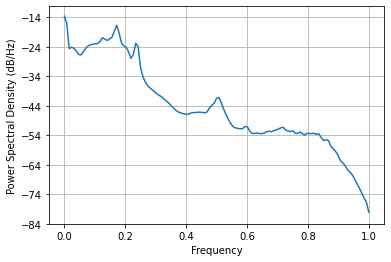

In [21]:
n_fft = 1024
y, sr = librosa.load(filename2, sr=44100)
S = librosa.stft(y, n_fft=n_fft)
psd=np.abs(S)**2
P = np.mean(psd, axis=1)

plt.psd(y)

In [22]:
S.shape

(513, 10336)

##metodos


###metodo 1

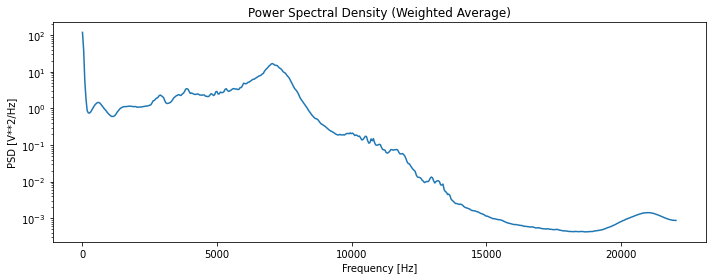

In [40]:



import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = '/content/drive/MyDrive/Jaguas_2018/G49_m'

audio_paths = [os.path.join(path_to_folder, filename)
    for filename in os.listdir(path_to_folder)
    if filename.endswith('.wav')]


sr = 44100
n_fft = 1024
duracion_total = librosa.get_duration(filename=audio_paths[-1])

longitud_total = int(duracion_total * sr / n_fft) + 1
sumatoria_spectrograms = np.zeros([513, longitud_total])

sr = 44100
n_fft = 1024
duracion_total = librosa.get_duration(filename=audio_paths[-1])

longitud_total = int(duracion_total * sr / n_fft) + 1
sumatoria_spectrograms = np.zeros([513, longitud_total])


for i in range(0, len(audio_paths)):
    audio, sr = librosa.load(audio_paths[i], sr=44100)
    spectrogram = librosa.stft(audio, n_fft=1024)
    psd = np.abs(spectrogram)**2
    psd = psd[:, :longitud_total] # corregir la forma de psd
    sumatoria_spectrograms += psd

f = librosa.fft_frequencies(sr=44100, n_fft=1024)

promedio1 = sumatoria_spectrograms/len(audio_paths)

plt.figure(figsize=(10,4))
plt.semilogy(f, np.mean(promedio1, axis=1))#forma logarítmica
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
plt.savefig("psd.pdf", format="pdf")
plt.show()




###metodo2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

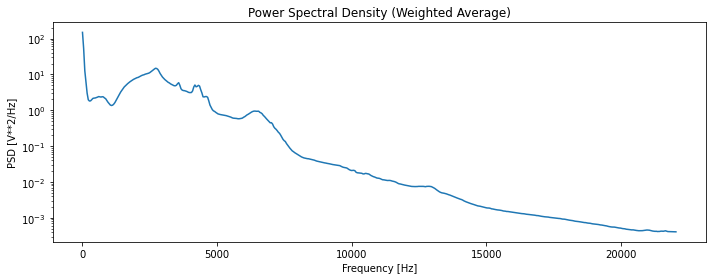

In [52]:

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = '/content/drive/MyDrive/Jaguas_2018/G09_m'

n_fft=1024

audio_paths = [os.path.join(path_to_folder, filename)
               for filename in os.listdir(path_to_folder)
               if filename.endswith('.wav')]


sumatoria_spectrograms = np.zeros([513, 10336])
for i in range(0, len(audio_paths)):
    #print(i)
    audio, sr = librosa.load(audio_paths[i], sr=44100)
    spectrogram = librosa.stft(audio, n_fft=1024)
    psd = np.abs(spectrogram)**2
    sumatoria_spectrograms += psd

f = librosa.fft_frequencies(sr=44100, n_fft=1024)
promedio = sumatoria_spectrograms/len(audio_paths)


plt.figure(figsize=(10,4))
plt.semilogy(f, np.mean(promedio, axis=1))#foma logariotmica
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
plt.savefig("psd_G09_m.pdf", format="pdf")
plt.show()




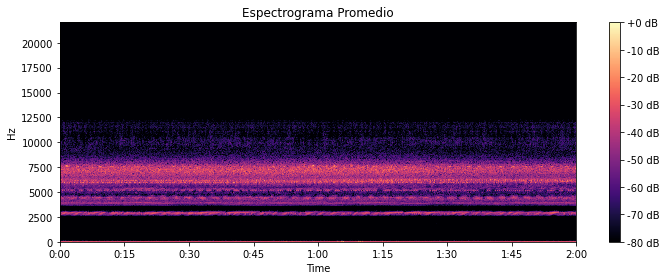

In [18]:
# Graficar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(promedio, ref=np.max),
                         y_axis='linear', x_axis='time', sr=sr, hop_length=512)
plt.title('Espectrograma Promedio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig("espectrograma.pdf", format="pdf")
plt.show()


###guardar en pickel

In [53]:

with open('psd_G09_m.pkl', 'wb') as f:
    pickle.dump(promedio, f)

In [38]:
with open('psd_G09_m.pkl', 'rb') as f:
    datos = pickle.load(f)

# Imprime los datos cargados
print(datos)

[[1.29984836e+02 1.15682820e+02 1.14318585e+02 ... 1.32613342e+02
  1.16050439e+02 1.20165623e+02]
 [3.87241955e+01 3.87150134e+01 3.98771065e+01 ... 7.45309873e+01
  4.19388977e+01 2.90922927e+01]
 [8.05912949e+00 7.70697281e+00 9.10346436e+00 ... 2.19696824e+01
  9.05454372e+00 4.91347184e+00]
 ...
 [2.45139336e-03 8.59308742e-04 2.63348154e-04 ... 1.81132020e-04
  7.98753175e-04 1.46725442e-03]
 [3.33815804e-03 1.11232935e-03 2.31715038e-04 ... 5.05123905e-04
  7.97352514e-04 7.97090148e-04]
 [3.84675625e-03 1.10473048e-03 2.84336060e-04 ... 1.44970785e-04
  7.04466217e-04 1.35465877e-03]]


##comparacion metodos 

In [44]:
metodo1 = promedio1
metodo2 = promedio

metodo1 == metodo2

<ipython-input-44-65651b72e78a>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  metodo1 == metodo2


False

In [45]:
metodo1

array([[1.29984836e+02, 1.15682820e+02, 1.14318585e+02, ...,
        1.15008138e+02, 1.12985934e+02, 1.15939612e+02],
       [3.87241955e+01, 3.87150134e+01, 3.98771065e+01, ...,
        3.57947528e+01, 3.89564299e+01, 4.36030099e+01],
       [8.05912949e+00, 7.70697281e+00, 9.10346436e+00, ...,
        3.37138032e+00, 9.05398788e+00, 7.69255912e+00],
       ...,
       [2.45139336e-03, 8.59308742e-04, 2.63348154e-04, ...,
        5.87597692e-04, 4.07187867e-04, 7.99473030e-04],
       [3.33815804e-03, 1.11232935e-03, 2.31715038e-04, ...,
        6.54885024e-04, 4.03457377e-04, 7.38557693e-04],
       [3.84675625e-03, 1.10473048e-03, 2.84336060e-04, ...,
        4.40708005e-04, 3.72797286e-04, 7.82087793e-04]])

In [46]:
metodo2

array([[1.29984836e+02, 1.15682820e+02, 1.14318585e+02, ...,
        1.32613342e+02, 1.16050439e+02, 1.20165623e+02],
       [3.87241955e+01, 3.87150134e+01, 3.98771065e+01, ...,
        7.45309873e+01, 4.19388977e+01, 2.90922927e+01],
       [8.05912949e+00, 7.70697281e+00, 9.10346436e+00, ...,
        2.19696824e+01, 9.05454372e+00, 4.91347184e+00],
       ...,
       [2.45139336e-03, 8.59308742e-04, 2.63348154e-04, ...,
        1.81132020e-04, 7.98753175e-04, 1.46725442e-03],
       [3.33815804e-03, 1.11232935e-03, 2.31715038e-04, ...,
        5.05123905e-04, 7.97352514e-04, 7.97090148e-04],
       [3.84675625e-03, 1.10473048e-03, 2.84336060e-04, ...,
        1.44970785e-04, 7.04466217e-04, 1.35465877e-03]])

##prueba psd iteracion con baches


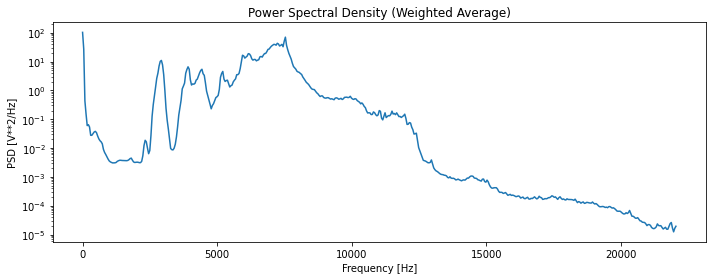

In [24]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = '/content/drive/MyDrive/Jaguas_2018/G49_m'
batch_size = 10 # define el tamaño de cada lote de archivos de audio que se van a procesar juntos
n_fft = 1024 #define la longitud de la transformada de Fourier utilizada para calcular el espectro de potencia de cada archivo de audio.

audio_paths = [os.path.join(path_to_folder, filename)
               for filename in os.listdir(path_to_folder)
               if filename.endswith('.wav')][:10]
#esta línea crea un array de numpy lleno de ceros para acumular los valores de espectro de potencia a lo 
#largo de todos los lotes de archivos de audio procesados. El tamaño del array es la mitad de la longitud de la transformada de Fourier más uno.
psd_accum = np.zeros(n_fft//2 + 1)
#crea una variable que acumulará los pesos de cada lote de archivos de audio procesados. Los pesos se utilizan para calcular un promedio ponderado del espectro de potencia de cada lote.
weights_accum = 0



#ste bucle itera a través de todas las rutas de archivo de audio en la lista audio_paths, dividiéndolas en lotes del tamaño especificado en batch_size.
for i in range(0, len(audio_paths), batch_size):
    batch_paths = audio_paths[i:i+batch_size] #crea una sublista de rutas de archivo de audio que se utilizará para procesar el lote actual.
    psd_list = []# lista vacía que almacenará los espectros de potencia resultantes de cada archivo de audio en el lote actual.
    long_audio = []#  lista vacía que almacenará los pesos correspondientes a cada espectro de potencia en psd_list
    for path in batch_paths:#bucle itera a través de todas las rutas de archivo de audio en el lote actual.
        # Cargar audio y calcular espectro de potencia
        audio_data, sr = librosa.load(path, sr=44100)
        S = librosa.stft(audio_data, n_fft=n_fft)
        Pxx = np.abs(S)**2 #esta línea calcula el espectro de potencia del archivo de audio a partir de la STFT calculada.
        # Promediar espectro de potencia a lo largo del tiempo
        Pxx_mean = np.mean(Pxx, axis=1)
        # Agregar espectro de potencia a la lista
        psd_list.append(Pxx_mean)
        long_audio.append(np.sum(Pxx_mean))
    # Calcular el promedio ponderado de los espectros de potencia
    psd_batch = np.average(psd_list, axis=0, weights=long_audio)
    # Agregar el promedio ponderado al promedio acumulado
    #Es un vector que almacena el espectro de potencia acumulado hasta el momento. En cada iteración, 
    #se le suma el espectro de potencia promedio del lote actual, ponderado por la suma de pesos de cada archivo en el lote (np.sum(weights)).
    psd_accum += psd_batch * np.sum(long_audio)#
    #s un escalar que almacena la suma acumulada de los pesos de todos los archivos de audio procesados hasta el momento. En cada iteración, se le suma la suma de pesos de los archivos en el lote actual (np.sum(weights)). 
    #El resultado es una acumulación de los pesos totales de todos los archivos, que se utiliza para calcular el promedio ponderado de los espectros de potencia.
    weights_accum += np.sum(long_audio)

# Calcular el promedio ponderado de todos los lotes de espectros de potencia
psd_avg = psd_accum / weights_accum

# Calcular las frecuencias correspondientes a los coeficientes de Fourier
sr = 44100
f = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Graficar espectro de potencia promedio ponderado
plt.figure(figsize=(10, 4))
plt.semilogy(f, psd_avg)
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
plt.show()


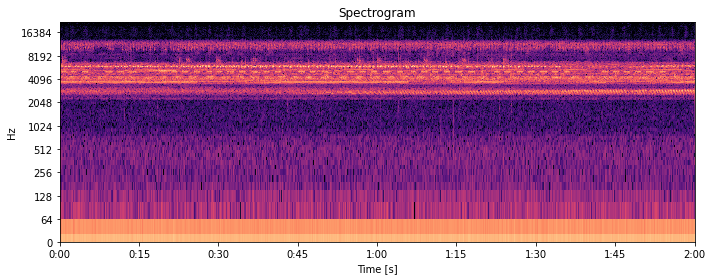

In [31]:


# Calcular y mostrar espectrograma
plt.figure(figsize=(10, 4))
for path in audio_paths:
    audio_data, sr = librosa.load(path, sr=44100)
    S = librosa.stft(audio_data, n_fft=n_fft)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    specshow(S_db, sr=sr, x_axis='time', y_axis='log' )
    
plt.title('Spectrogram')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.show()




In [50]:
import os
import shutil

path_to_audio_folders = '/content/drive/MyDrive/Jaguas_2018/'

for foldername in os.listdir(path_to_audio_folders):
    if os.path.isdir(os.path.join(path_to_audio_folders, foldername)):
        folder_audio_count = 0
        folder_path = os.path.join(path_to_audio_folders, foldername)
        
        print('Carpeta:', foldername)
        
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'):
                folder_audio_count += 1
        
        print('Cantidad de archivos de audio:', folder_audio_count)


Carpeta: G41_m
Cantidad de archivos de audio: 553
Carpeta: G46_m
Cantidad de archivos de audio: 735
Carpeta: G49_m
Cantidad de archivos de audio: 801
Carpeta: G58_m
Cantidad de archivos de audio: 735
Carpeta: G52_m
Cantidad de archivos de audio: 465
Carpeta: G50_m
Cantidad de archivos de audio: 620
Carpeta: G54_m
Cantidad de archivos de audio: 576
Carpeta: G47_m
Cantidad de archivos de audio: 804
Carpeta: G51_m
Cantidad de archivos de audio: 408
Carpeta: G57_m
Cantidad de archivos de audio: 621
Carpeta: G25_m
Cantidad de archivos de audio: 645
Carpeta: G27_m
Cantidad de archivos de audio: 644
Carpeta: G29_m
Cantidad de archivos de audio: 553
Carpeta: G35_m
Cantidad de archivos de audio: 627
Carpeta: G34_m
Cantidad de archivos de audio: 664
Carpeta: G24_m
Cantidad de archivos de audio: 555
Carpeta: G40_m
Cantidad de archivos de audio: 555
Carpeta: G36_m
Cantidad de archivos de audio: 545
Carpeta: G37_m
Cantidad de archivos de audio: 541
Carpeta: G28_m
Cantidad de archivos de audio: 553
